In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
delivery = pd.read_csv('deliveries.csv')
match = pd.read_csv('matches.csv')

In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match.shape

(756, 18)

In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
total_score_df =delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [7]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [8]:
match_df =match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [9]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
teams =[
    'Sunrisers Hyderabad', 'Mumbai Indians','Royal Challengers Bangalore','Kolkata Knight Riders','Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Capitals'
]
match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [11]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [12]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158


In [13]:
match_df = match_df[match_df['dl_applied']==0]

In [14]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [15]:
delivery_df =match_df.merge(delivery,on='match_id')

In [16]:
delivery_df =delivery_df[delivery_df['inning']==2]

In [17]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [18]:
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [19]:
delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']+1

In [20]:
delivery_df['balls_left']=126-(delivery_df['over']*6+delivery_df['ball'])

In [21]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115


In [22]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna(0)
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x : x if x ==0  else 1)


In [23]:
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

In [24]:
delivery_df['wickets']=10- wickets

In [25]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [26]:
delivery_df['crr']=delivery_df.current_score*6/(120-delivery_df.balls_left)

In [27]:
delivery_df['rrr']=delivery_df.runs_left*6/delivery_df.balls_left

In [28]:
delivery_df = delivery_df.reset_index()


In [29]:
delivery_df.drop(columns='index',inplace=True)

In [30]:
def is_win(df):
    winner = []
    for item,row in df.iterrows():
        if row.winner == row.batting_team:
            winner.append(1)
        else:
            winner.append(0)

    return winner



In [31]:
delivery_df['winner']=is_win(delivery_df)

In [32]:
final_df =delivery_df[['match_id','batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','winner']]


In [33]:

final_df =final_df.sample(final_df.shape[0])


In [34]:
final_df['batting_team']=final_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

final_df['batting_team']=final_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

In [35]:
print(final_df.city.unique())
print(final_df.batting_team.unique())


['Visakhapatnam' 'Kolkata' 'Delhi' 'Nagpur' 'Chandigarh' 'Mohali'
 'Cuttack' 'Jaipur' 'Bangalore' 'Mumbai' 'Pune' 'Dharamsala' 'Chennai'
 'Hyderabad' 'Port Elizabeth' 'Bengaluru' 'Raipur' 'Ranchi' 'Centurion'
 'Ahmedabad' 'Sharjah' 'East London' 'Indore' 'Durban' nan 'Johannesburg'
 'Cape Town' 'Kimberley' 'Abu Dhabi' 'Bloemfontein']
['Mumbai Indians' 'Sunrisers Hyderabad' 'Delhi Capitals'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Chennai Super Kings'
 'Rajasthan Royals' 'Royal Challengers Bangalore']


In [36]:
import random
cities_dict = {
    'Royal Challengers Bangalore':'Bengaluru',
    'Chennai Super Kings':'Chennai',
    'Kings XI Punjab':'Mumbai',
    'Kolkata Knight Riders':'Kolkata',
    'Delhi Capitals':'Delhi',
    'Rajasthan Royals':'Jaipur',
    'Mumbai Indians':'Mumbai',
    'Sunrisers Hyderabad':'Hyderabad',
}
final_df['city']=final_df['city'].fillna(0)
def fill_city(x):
    if x.city == 0:
        team = [x.batting_team,x.bowling_team][random.randint(0,1)]
        return cities_dict[team]
    else :
        return x.city


final_df['city']=final_df.apply(fill_city,axis=1)

In [37]:
final_df.dropna(inplace=True)
final_df =final_df[final_df.balls_left !=0]

In [38]:
from sklearn.model_selection import train_test_split
X = final_df.drop(columns=['winner','match_id'])
y = final_df['winner']
X_copy =final_df.drop(columns=['winner'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [40]:

ohe = OneHotEncoder()
ohe.fit_transform(X.iloc[:,:3])
category = ohe.categories_
trf = ColumnTransformer([
    ('trf',OneHotEncoder(categories=category,sparse=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')


In [41]:
pipe = Pipeline([
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
#     ('step2',RandomForestClassifier(n_jobs=-1))
])
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(categories=[array(['Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object),
                                                                            array(['Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab...
       'Cape Town', 'Centurion', 'Chandigarh', 'Chennai', 'Cuttack',
       'Delhi', 'Dharamsala', 'Durban', 'East London', 'Hyderabad',
       'Indore', 'Jaipur', 'Johannesburg', 'Kimberley', 'Kolkata',
       'Mohali', 'Mumbai', 'Nagpur', 'Port Elizabeth', 'Pune', 'Raipur',
       'Ranchi', 'Sharjah', 'Visakhapatnam'], dtype=object)],
                                                                drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [42]:
y_pred = pipe.predict_proba(X_test)
# accuracy_score(y_test,y_pred)
y_pred

array([[0.82934461, 0.17065539],
       [0.78295432, 0.21704568],
       [0.23869023, 0.76130977],
       ...,
       [0.78006205, 0.21993795],
       [0.16644959, 0.83355041],
       [0.12208243, 0.87791757]])

In [43]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [44]:
temp_df ,target =match_progression(delivery_df,513,pipe)

Target- 189


Text(0.5, 1.0, 'Target-189')

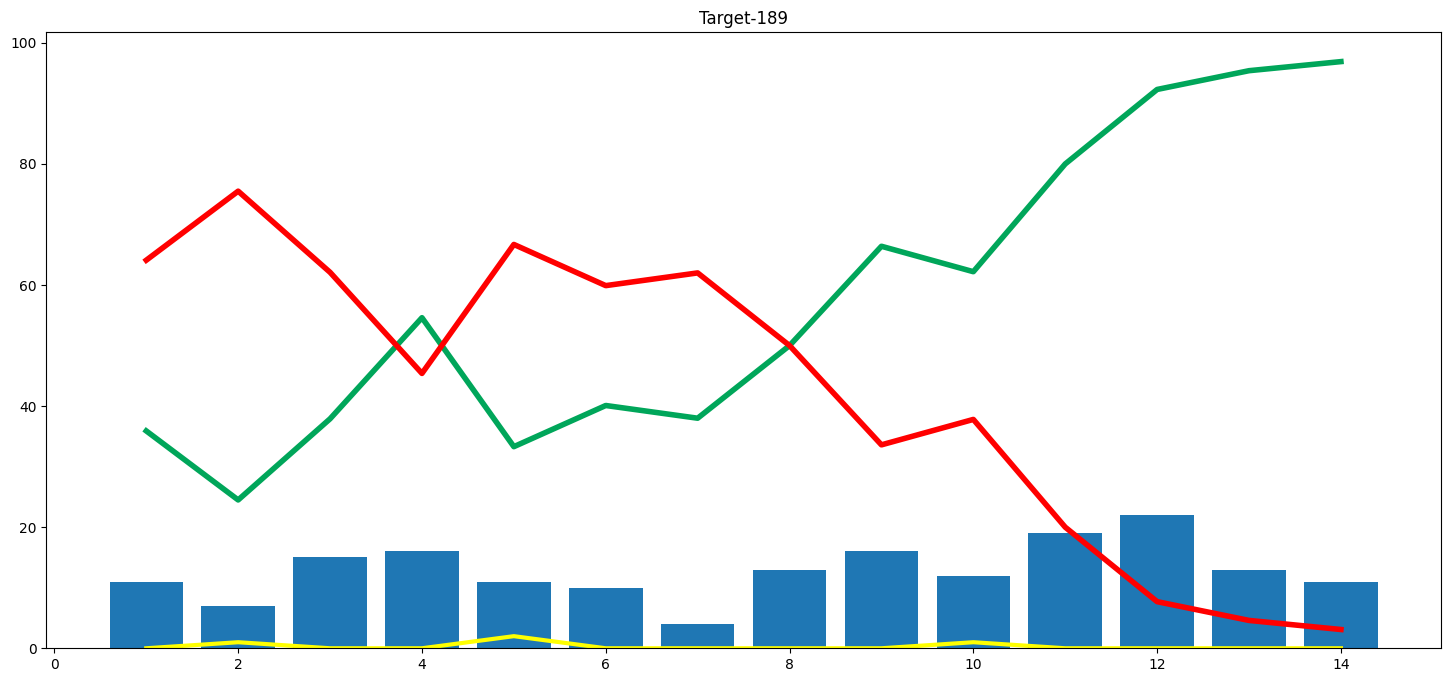

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))


In [46]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [47]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [48]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [49]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
16266,Delhi Capitals,Kings XI Punjab,Chandigarh,142,119,10,142,6.000000,7.159664
11769,Kolkata Knight Riders,Mumbai Indians,East London,128,91,8,148,4.344828,8.439560
932,Kings XI Punjab,Delhi Capitals,Delhi,183,109,9,188,3.272727,10.073394
28191,Mumbai Indians,Chennai Super Kings,Chennai,64,86,10,112,8.647059,4.465116
10669,Delhi Capitals,Royal Challengers Bangalore,Port Elizabeth,149,118,10,149,3.000000,7.576271
...,...,...,...,...,...,...,...,...,...
33044,Kolkata Knight Riders,Mumbai Indians,Kolkata,32,2,7,182,7.677966,96.000000
35936,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,80,67,9,154,8.490566,7.164179
40580,Mumbai Indians,Sunrisers Hyderabad,Mumbai,79,36,6,178,7.142857,13.166667
29521,Delhi Capitals,Sunrisers Hyderabad,Delhi,136,94,8,157,5.076923,8.680851
